Task-1...predict the percentage of marks that a student is expected to score based upon the number of hours they studied...

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
link = "http://bit.ly/w-data"
student_df = pd.read_csv(link)
print("Imported the data")

Imported the data


In [3]:
cols=list(student_df.columns)
cols

['Hours', 'Scores']

In [4]:
student_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


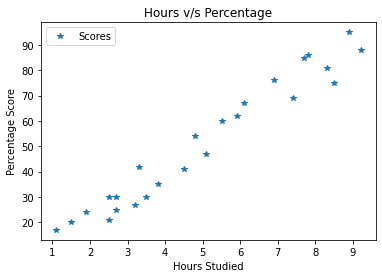

In [7]:
#graph of hours v/s percentage
student_df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
x = student_df.iloc[:, :-1].values  
y = student_df.iloc[:, 1].values  
x
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [9]:
#splitting data as test and train data sets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

# Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 
print("Training successfull.")

Training successfull.


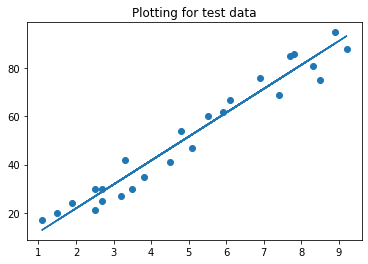

In [11]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.title("Plotting for test data")
plt.show()

# Predictions

In [12]:
#predicting the scores
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [13]:
#comparing actual and predicted data values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


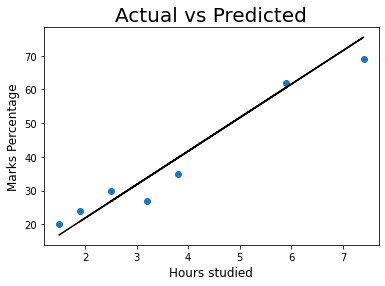

In [14]:
#graph of actual v/s predicted marks
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test,y_pred,color='Black');
plt.title("Actual vs Predicted",size=20)
plt.xlabel('Hours studied',size=12)
plt.ylabel('Marks Percentage',size=12)
plt.show()

In [15]:
#performace evaluation
hours = [9.25]
mark_pred = reg.predict([hours])
df=pd.DataFrame({'hours':hours,'Predicted':mark_pred})
df

,hours,Predicted
0,9.25,93.892729


# Model Evaluation

In [16]:
#calculating the accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test, y_pred),3)) 
print('Mean squared Error:',round(metrics.mean_squared_error(y_test, y_pred),3))
print('variance:',round(metrics.mean_absolute_error(y_test, y_pred),3)) 
print('R2 score:',round(metrics.r2_score(y_test, y_pred),3))

Mean Absolute Error: 4.131
Mean squared Error: 20.333
variance: 4.131
R2 score: 0.937
